###Project overview

You work for a staffing agency that specializes in finding qualified candidates for development roles. One of your latest clients is growing rapidly and wants to understand what kinds of developers they can hire, and to understand general trends of the technology market. Your organization has access to this Stack Overflow dataset, which consists of survey responses by developers all over the world for the last few years.

Your project is to put together several statistical analyses about the community to educate your client about the potential hiring market for their company.

##Exploratory analysis

In [1]:
import pandas as pd

df = pd.read_csv('developer_dataset.csv')

#Listing all columns in the dataframe
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/2873554251.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [2]:
#In order to identify missing or left out data values, count all rows per column.
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

I see that some rows are missing data or is left blank. Identify numerical columns and perform summary statistics - averages, max and min values, and number of missing data points.

In [3]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Based on the information above, what observations can be made about the dataset?

- Are there columns that have more missing data than others?
- Which columns seem interesting? What insight may I gain from the data?
- Are there columns that potentially have more sensitive data than others? How would that change our strategy in dealing with them?

##Delete highly missing data
I notice this dataset has a number of columns with a significant amount of missing data. With this much missing data, it is unlikely that any statistical analysis using that data would be accurate and representative of the developers who filled out the survey. It is safe to remove columns with 60% or more missing data.

In [7]:
maxRows = df['RespondentID'].count()

print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [8]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], inplace=True, axis=1)

##Analyse developers by country
I want to investigate the distribution of employement and developertype from geographical (i.e. country) perspective. Ensure that there are no missing data for employment and developer type.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()


,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


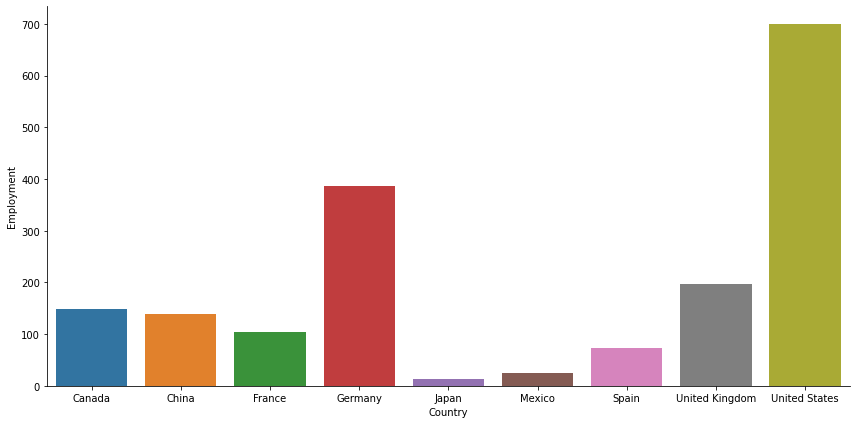

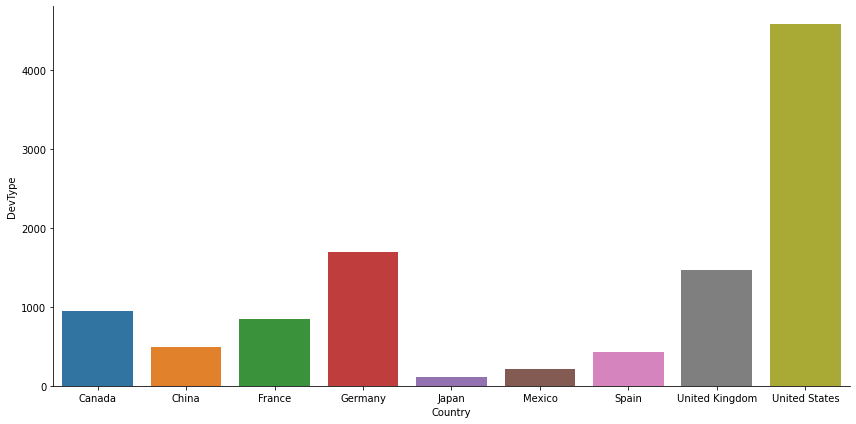

In [12]:
missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(
    data = missingData,
    kind = 'bar',
    x = 'Country',
    y = 'Employment',
    height = 6,
    aspect = 2
)

B = sns.catplot(
    data = missingData,
    kind = 'bar',
    x = 'Country',
    y = 'DevType',
    height = 6,
    aspect = 2
)

In the above plots, the data doesn’t appear to be missing for any country significantly more than any other. We may however assume that missing data scale relative to the size of each country. Given the fact that countries as US and Germany have significantly more developers (on average), it is therefore explanatory why this countries have more missing data than others.

We determine that the missing data for the these two columns are Missing Completely at Random (MCAR), meaning it is safe to delete the rows with missing data in these columns. In order to do so, I will employ pairwise deletion to only delete the rows that have missing data for either Employement or DevType.

In [13]:
df.dropna(
    subset = ['Employment', 'DevType'],
    inplace=True,
    how='any'
)

We may now analyze the distribution of employment and developer type by country. First, we will aggregate employement data by key developer roles that align with major parts of the development lifecycle:

- Back-end
- Front-end
- Full-stack
- Mobile development
- Administration roles

/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/4027379875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/4027379875.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/4027379875.py:14: SettingWithCopyWarning: 
A val

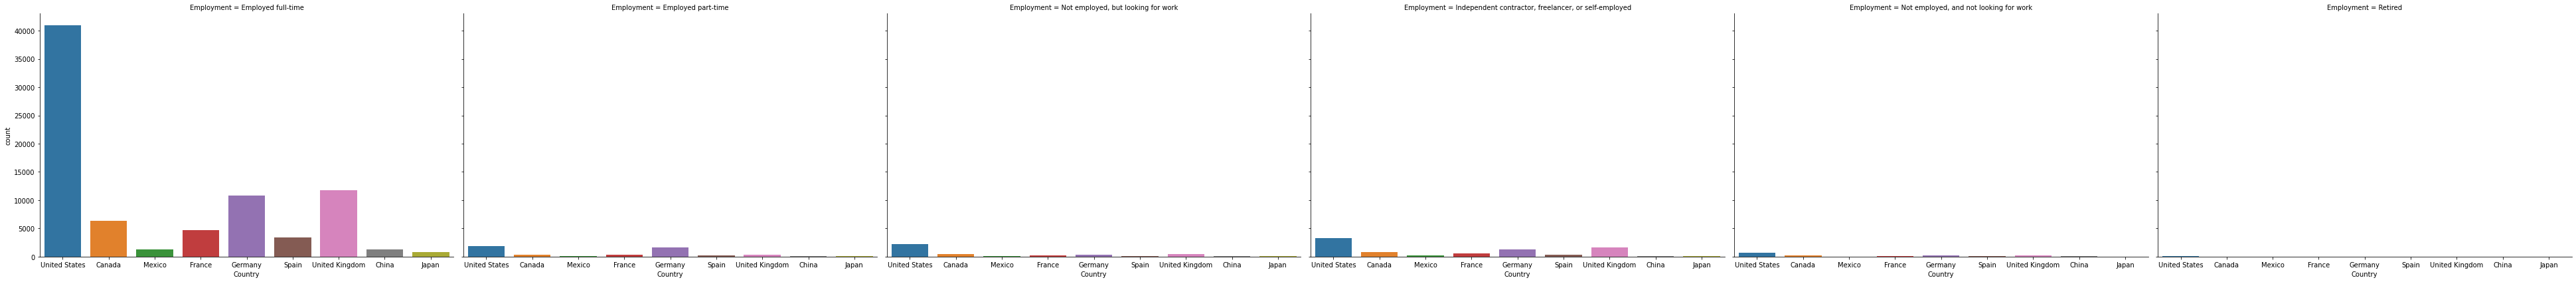

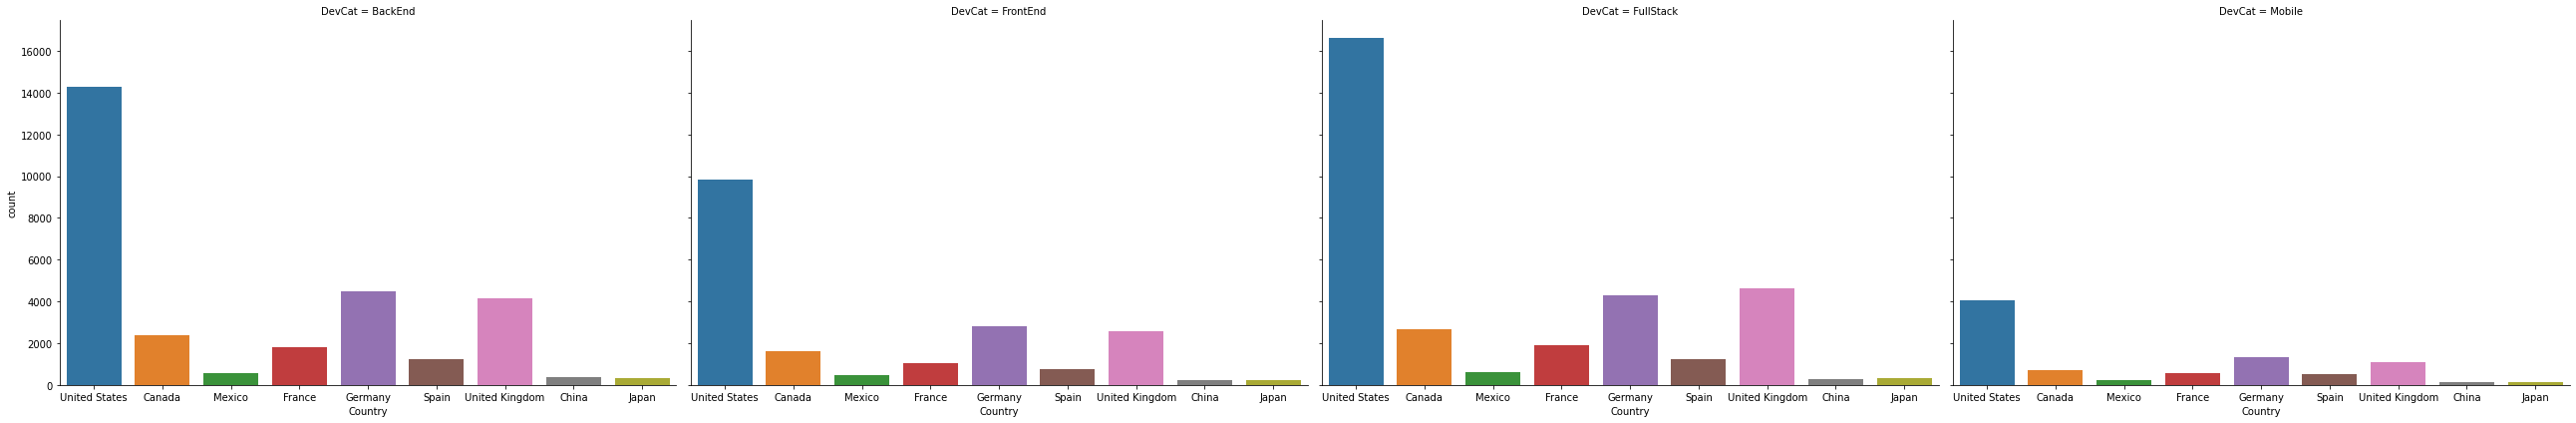

In [17]:
empfig = sns.catplot(
    x='Country',
    col='Employment',
    data=df,
    kind='count',
    height=6,
    aspect=1.5
)

# Focus on a few of the developer types outlined in the Stock Overflow survey
devdf = df[['Country', 'DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administration'), 'Admin'] = True

devdf = devdf.melt(
    id_vars=['Country'],
    value_vars=['BackEnd', 'FrontEnd', 'FullStack', 'Mobile', 'Admin'],
    var_name='DevCat',
    value_name='DevFlag'
)

devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(
    x='Country',
    col='DevCat',
    data=devdf,
    kind='count',
    height=6,
    aspect=1.5
)

From this, we see that the majority of respondents are fulltime employees. Since these developers are mainly employed, this data may be relevant for an employer who wants to see what developers look for in a potential job. We also see that the majority of developers are either backend, frontend or fullstack. This indicates that the market values developers who excel in atleast one major part of the development lifecycle, if not the entire stack.

##Investigate developer undergraduate majors
Moving onwards, we want to understand what trends in educational background ultimately led to a career in technology. In particular, we want to look for overall trends of majors year over year for respondents. As seen earlier in the analysis, we are missing about 11% of the data for the UndergradMajor coloumn and we need to understand why.

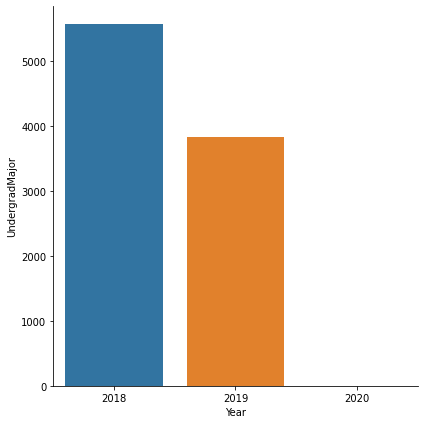

In [25]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(
    x = 'Year',
    y = 'UndergradMajor',
    data = missingUndergrad,
    kind = 'bar',
    height = 6,
    aspect = 1
)

We see that all of the data for 2020 undergrad majors is filled in, indicating that each participant in these surveys had some level of decision for their undergrad major. For the purposes of this analysis, we are most interested in what major a person ultimately landed on, as this would be the educational background they would carry into a job search. We want to carry that value backwards for each participant to fill in any missing data. This is a great use for Single Imputation techniques.

/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/2191849792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/2191849792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/2191849792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

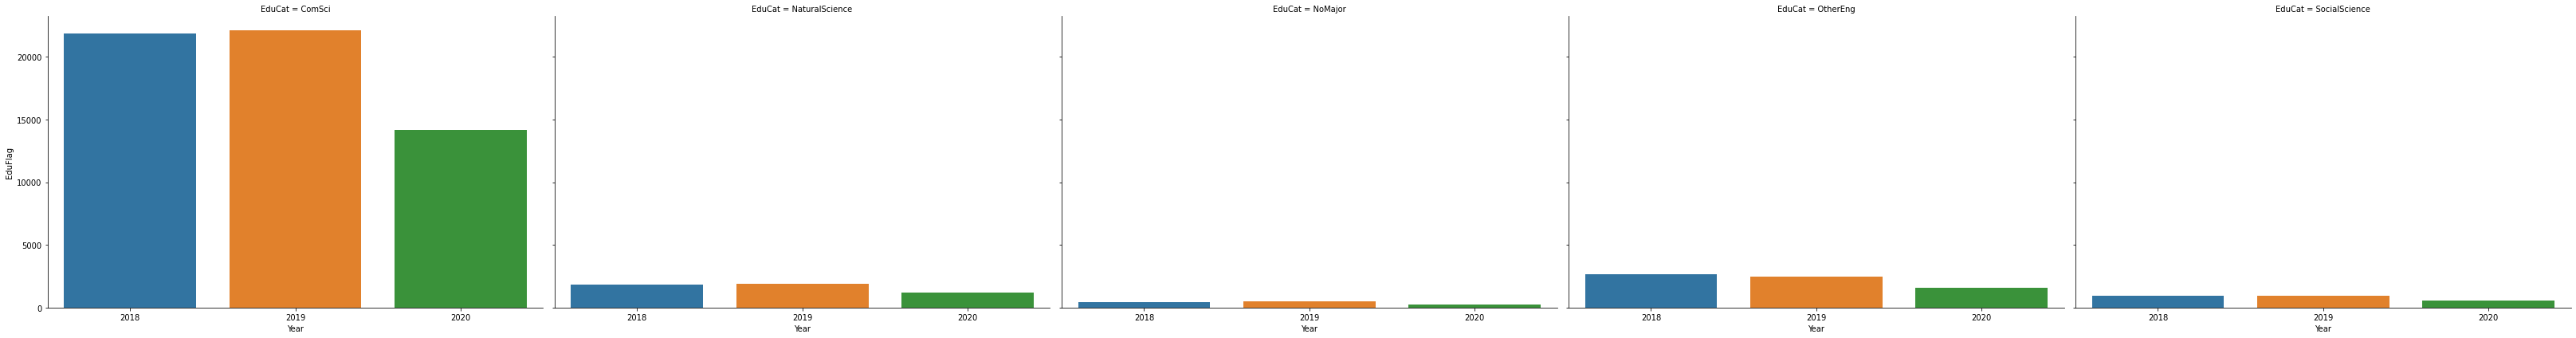

In [35]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(
    id_vars=['Year'],
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'],
    var_name='EduCat',
    value_name='EduFlag'
)

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(
    x="Year",
    y='EduFlag',
    col="EduCat",
    data=edudf,
    kind="bar",
    height=6,
    aspect=1.5
);

We notice that the vast majority of people who enter the workforce for development have some background in a Computer Science major. Interestingly, however, the number of Computer Science majors significantly declined over the years surveyed, indicating that there could be other majors that have successfully entered the workforce for their desired job. This would require further analysis and could allow an individual to pursue a separate education path and still end up in some kind of developer role.

##Examine the relationship between years of experience and compensation
At this point, I have studied the demographics of developers around the world, from where they live to the education paths they have taken. Now, I want to focus on the various aspects that would influence the job-hunting process.

Years of experience are an important metric when looking to understand the general skill and technical capabilities of a potential candidate. Compensation is also important for the client to understand what the “going rate” for a particular developer is in today’s market. I assume that there is a strong correlation between experience and job compensation, making it an excellent hypothesis to explore.

In order to understand a bit about the data for each of these two fields, I will perform some more exploratory analysis:

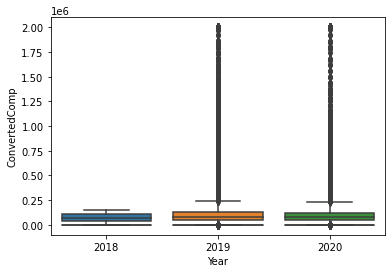

In [40]:
compFields = df[['Year', 'YearsCodePro', 'ConvertedComp']]

D = sns.boxplot(
    x='Year',
    y='YearsCodePro',
    data=compFields
)

E = sns.boxplot(
    x='Year',
    y='ConvertedComp',
    data=compFields
)

Although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation.

In [41]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro', 'ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

#Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

#Fit the model to the test dataset
imp.fit(imputedf)

#Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf), 0), columns=['YearsCodePro', 'ConvertedComp'])

The above code will loop through (up to 20 times), and fill the missing data based on the context provided by the other column. This should create data points that are indicative of the overall trend of the data. Now, I may analyze the relationship between YearsCodePro and ConvertedComp through a boxplot.

/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_1893/1698164070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

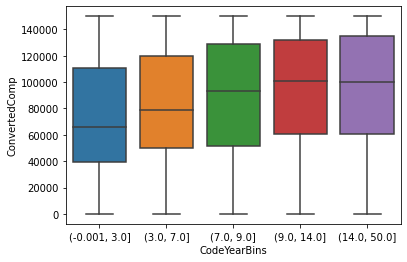

In [47]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(
    x='CodeYearBins',
    y='ConvertedComp',
    data=compPlotdf
)

The plot above validates the hypothesis above. While there are high (and low) earning developers at every experience level, experience appear to correlate with compensation. The more experienced a developer was, the more they're compensated (on average).